Getting Started

Loading and reviewing the data set

In [8]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('IMDB Dataset.csv')

# Displaying the first fwe rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Inspecting the dataset

In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [10]:
df.isnull().sum()

df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [15]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initialize the lemmatizer and stop words list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def handle_negations(words):
    negation_words = ["not", "no", "never", "none", "nobody", "nothing", "neither", "nowhere", "hardly", "scarcely", "rarely"]
    
    for i in range(len(words)):
        if words[i] in negation_words and i < len(words) - 1:
            words[i + 1] = "not_" + words[i + 1]  # Change 'good' to 'not_good'
        if words[i] == "not" and i < len(words) - 2:
            # Handling "not very good"
            if words[i + 1] == "very":
                words[i + 2] = "not_very_" + words[i + 2]
                words[i + 1] = ""  # Remove "very"
    
    return words

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'<br\s*/?>', ' ', text)  # Replace <br/> with space
    text = re.sub(r'<[^>]+>', '', text)  # Remove any remaining HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words (optional)
    words = [word for word in words if word not in stop_words]

    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]

    # Handle negations
    words = handle_negations(words)

    # Join words back into a single string
    cleaned_text = ' '.join(words)
    
    # Remove extra whitespace
    cleaned_text = ' '.join(cleaned_text.split())
    
    return cleaned_text

df['cleaned_review'] = df['review'].apply(preprocess_text)


In [16]:
for i in range(5):  # Print the first 5 samples
    print(f"Original: {df.iloc[i]['review']}")
    print(f"Cleaned: {df.iloc[i]['cleaned_review']}\n")


Original: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due 

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['sentiment_encoded'] = le.fit_transform(df['sentiment'])

df[['sentiment', 'sentiment_encoded']].head()

df['sentiment_encoded'].value_counts()

sentiment_encoded
1    25000
0    25000
Name: count, dtype: int64

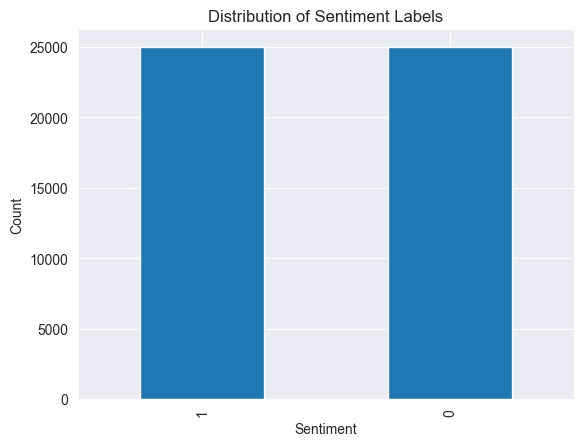

In [18]:
import matplotlib.pyplot as plt

# Plot distribution of sentiment labels
df['sentiment_encoded'].value_counts().plot(kind='bar')

plt.title('Distribution of Sentiment Labels')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [19]:
# Calculate the length of each cleaned review
review_lengths = df['cleaned_review'].str.len()

# Get a statistical summary of review lengths
print(review_lengths.describe())


count    50000.000000
mean       822.966240
std        634.332893
min         17.000000
25%        432.000000
50%        605.000000
75%       1000.000000
max       9221.000000
Name: cleaned_review, dtype: float64


In [20]:
# Set the maximum length for reviews
MAX_LENGTH = 1500

# Truncate reviews longer than MAX_LENGTH
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: x[:MAX_LENGTH])


In [21]:
# Set the minimum length for reviews
MIN_LENGTH = 700

# Pad reviews shorter than MIN_LENGTH
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: x.ljust(MIN_LENGTH))


In [22]:
print(df['cleaned_review'].apply(len).describe())

# Sample of truncated reviews
df[df['cleaned_review'].str.len() == MIN_LENGTH].sample(5)['cleaned_review']


count    50000.000000
mean       884.919040
std        289.874785
min        700.000000
25%        700.000000
50%        700.000000
75%       1000.000000
max       1500.000000
Name: cleaned_review, dtype: float64


3074     ever write movie make would want one like one ...
44506    found film rather brilliant initially wanted a...
11963    film deal irish rebellion 1920s specifically o...
26376    didnt know expect film well know truly awful f...
19200    cliche romance drama movie simple plot good ci...
Name: cleaned_review, dtype: object

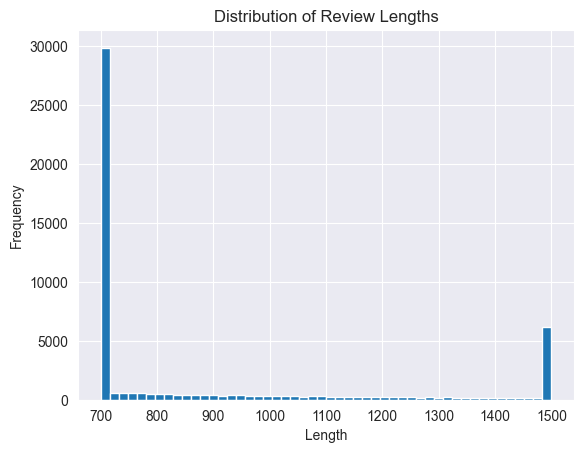

In [23]:
import matplotlib.pyplot as plt

plt.hist(df['cleaned_review'].apply(len), bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=25000, min_df=5, ngram_range=(1, 3))

matrix = vectorizer.fit_transform(df['cleaned_review'])

In [52]:
# Convert the matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())

print(tfidf_df.shape)

(50000, 25000)


Splitting the data

In [53]:
from sklearn.model_selection import train_test_split

# Features and labels
X = matrix  
y = df['sentiment']


In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# Verify the split
print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Testing set size: {X_test.shape}, {y_test.shape}")


Training set size: (40000, 25000), (40000,)
Testing set size: (10000, 25000), (10000,)


In [56]:
# Review some sample data from the training set
print("Sample of cleaned reviews from training data:")
for i in range(5):  # Displaying first 5 samples
    print(f"Review {i+1}:")
    print(X_train[i])  # Print the feature vector
    print("Sentiment:", y_train.iloc[i])
    print()


Sample of cleaned reviews from training data:
Review 1:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 198 stored elements and shape (1, 25000)>
  Coords	Values
  (0, 15752)	0.039974250961907556
  (0, 9076)	0.049069175261378405
  (0, 4991)	0.04849606378866199
  (0, 15100)	0.03384215128552151
  (0, 1617)	0.045362643098825636
  (0, 14989)	0.06986720574039627
  (0, 8851)	0.05499974832073399
  (0, 24015)	0.029424739640508984
  (0, 11886)	0.05170889277533071
  (0, 12592)	0.03455188992516672
  (0, 9032)	0.03663156656357349
  (0, 24753)	0.05082704688547305
  (0, 17962)	0.028651743837741987
  (0, 5740)	0.08492273316228664
  (0, 22226)	0.040272939070826914
  (0, 22350)	0.02481252346520153
  (0, 16939)	0.03328150390705826
  (0, 5326)	0.05008635066328553
  (0, 3382)	0.02721637904564077
  (0, 13543)	0.06767928335981409
  (0, 13396)	0.10044570890535849
  (0, 10602)	0.05226452425684776
  (0, 10725)	0.05858675237581911
  (0, 8565)	0.04214773250333443
  (0, 22090)	0.03209787227051467
  

In [57]:
# Review some sample text data (not the vectorized form)
print("Sample of cleaned reviews from training data:")
for i in range(5):  # Displaying first 5 samples
    print(f"Review {i+1}:")
    print(df.iloc[y_train.index[i]]['cleaned_review'])  # Print the actual text review
    print("Sentiment:", y_train.iloc[i])
    print()


Sample of cleaned reviews from training data:
Review 1:
thats kept asking many fight screaming match swearing general mayhem permeate 84 minute comparison also stand think onedimensional character little depth virtually impossible care happens badly written cypher director hang multicultural belief topic done much better drama tv cinema must confess im really one spotting bad performance film must said nichola burley heroine slutty best friend wasim zakir nasty bullying brother absolutely terrible dont know acting school graduated id apply full refund post haste samina awan lead role manages impress cast socalled british talent well probably never not_hear least thats hope next time hire different scout another intriguing thought hideously fashionable soundtrack featuring like snow patrol ian brown keane im bit music fan im familiar artist output didnt recognise track movie apart omnipresent run bsides anyone get many many musical montage telegraph suppose feel accompanied startlingly 

In [58]:
# To understand what words are associated with high values in the vector
feature_names = vectorizer.get_feature_names_out()  # Get feature names
dense = X_train[0].todense()  # Take the first sample and convert to dense matrix
denselist = dense.tolist()  # Convert to list
df_tfidf = pd.DataFrame(denselist, columns=feature_names)  # Create DataFrame

# Sort words by their TF-IDF score for the first review
sorted_words = df_tfidf.iloc[0].sort_values(ascending=False)
print("Top words in the first review:")
print(sorted_words.head(20))  # Show top 20 words


Top words in the first review:
must                        0.125242
im                          0.112483
stand                       0.110279
telegraph                   0.108445
onedimensional character    0.105733
comeuppance                 0.105332
doorway                     0.104944
cypher                      0.104568
get many                    0.103502
84                          0.102519
slutty                      0.102519
fashionable                 0.102207
hideously                   0.101607
must confess                0.101317
dessert                     0.100757
done death                  0.100485
many                        0.100446
bullying                    0.099960
patrol                      0.099960
already done                0.099960
Name: 0, dtype: float64


Initializing Naive Bayes model

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

model = MultinomialNB()

In [60]:
# Train the model
model.fit(X_train, y_train)


MultinomialNB()

In [61]:
y_pred = model.predict(X_test)

from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 0.5, 1, 2, 5]}
grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(X_test)


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))


Grid system has been used and only got a 0.8507 so sticking with current model

In [62]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.878


In [63]:
from sklearn.metrics import classification_report

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.86      0.88      4961
    positive       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



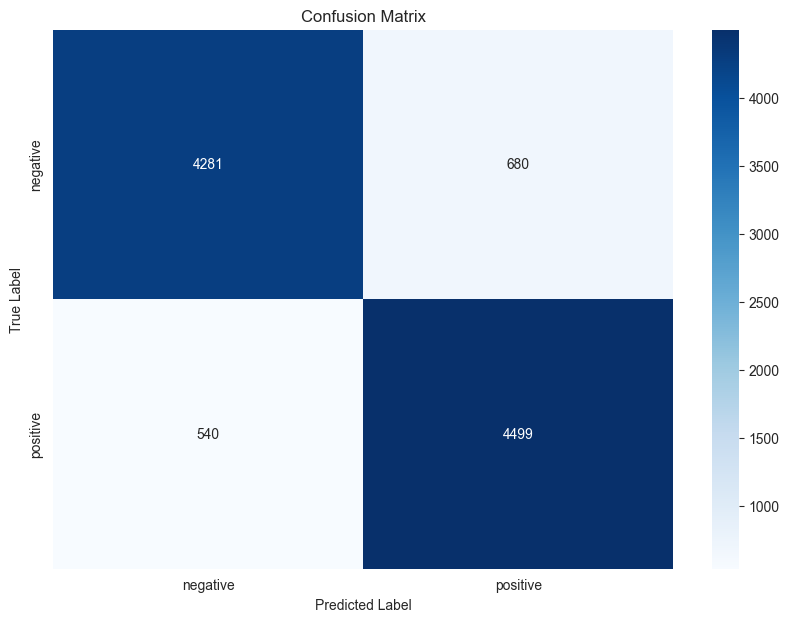

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['negative', 'positive'], 
            yticklabels=['negative', 'positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [65]:
import joblib
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Print the results
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")


Cross-Validation Accuracy Scores: [0.8775 0.8826 0.8764 0.873  0.8804]
Mean Accuracy: 0.8780
Standard Deviation: 0.0033


In [66]:
# Save the model and the vectorizer to files only after evaluation
joblib.dump(model, 'sentiment_analysis_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
print("Model and vectorizer saved successfully.")


Model and vectorizer saved successfully.
